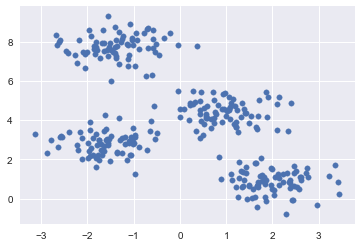

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
from sklearn.cluster import KMeans
import sklearn.preprocessing
from sklearn.datasets.samples_generator import make_blobs
from math import sqrt, floor
from sklearn import metrics
import sklearn.metrics as sm
import time

#generating the data from sklearn datasets and specifying the cluster centers to be 4. 
X,y_true=make_blobs(n_samples=300, centers=4, cluster_std=0.6, random_state=0)

# plot the dataset using plt.scatter()
plt.scatter(X[:, 0], X[:, 1], s=30)
plt.show()

In [36]:
#print(X)
#print(X.shape)

In [37]:

def naive_Sharding(X, k):
    

    p=np.shape(X)[1] #rows
    q=np.shape(X)[0] #columns 
      
    centroids= np.mat(np.zeros((k,p)))
    
    
    summation=np.mat(np.sum(X, axis=1)) #summing the coloumn values for each row in the data set 
    
    #before appending the new coloumn to the data set, we need to calculate the transpose and then append in into the data set  
    X=np.append(summation.T,X,axis=1) 
    
    X.sort(axis=0) #sorting the instances of the data set by the newly created sum coloumn 
    
    
    shards=floor(q/k) #splitting the data set horizontally into k equal sized pieces
    
    getmean=np.vectorize(mean)
    
    for j in range(k): #for each shard, we sum the attribute coloumn excluding the new coloumn,
        #then we comoute the mean and place it into a new row
        if j==k-1:
            centroids[j:] = getmean(np.sum(X[j*shards:,1:], axis=0), shards)
        else:
            centroids[j:] = getmean(np.sum(X[j*shards:(j+1)*shards,1:], axis=0), shards)
            
    return centroids #return the set of centroids instances to the calling function for use in the k means algorithm 

In [38]:
def mean(sums,shards): 
    return sums/shards

In [39]:
centroidss=naive_Sharding(X,4) 
print (centroidss) #new initialized centroids 

[[-1.97141208  0.85010449]
 [-0.9986298   2.80456394]
 [ 0.83840588  4.4629264 ]
 [ 2.10632549  7.75368871]]


In [40]:

#print(composite)
#h=composite.T
#print(h)
#print(X_scaled)
#X_scaled=np.append(composite,X_scaled, axis=1)
#print(X_scaled)
#print(X)
#z=np.array([[1,1,1],[1,1,1]])
#x=np.shape(z)[1]
#y=np.shape(z)[0]
#print(z.shape)
#print(z)

#print(centroids)


#sumarr=np.mat(np.sum(z,axis=1))
#print(sumarr)

#z=np.append(sumarr.T, z, axis=1)
#print(z)
#z.sort(axis=0)


Accuracy: 0.25
Iterations: 4
Time: 0.013714999999997701


/anaconda3/lib/python3.6/site-packages/sklearn/cluster/k_means_.py:968: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return_n_iter=True)


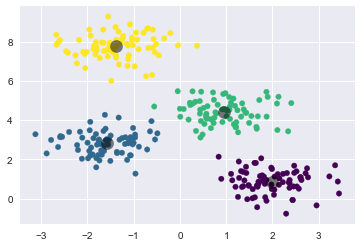

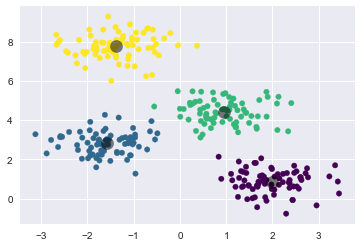

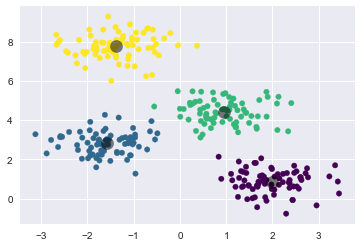

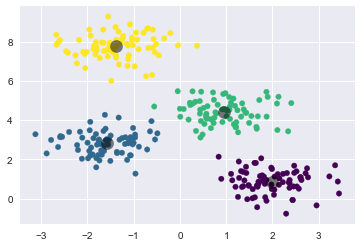

In [54]:
t0_naive_sharding_model = time.clock()

naive_sharding=KMeans(n_clusters=4, init=centroidss) #applying the naive sharding algorithm with the initialized centers
naive_sharding.fit(X)
naive_sharding_y=naive_sharding.predict(X)

t1_naive_sharding_model = time.clock()

elapsed_time_naive_sharding_model = t1_naive_sharding_model - t0_naive_sharding_model

print('Accuracy:',sm.accuracy_score(y_true, naive_sharding.labels_))
print('Iterations:', naive_sharding.n_iter_) 
print('Time:', elapsed_time_naive_sharding_model)


z=naive_sharding.n_iter_
centers=naive_sharding.cluster_centers_ #to plot the centers 

for i in range (z):
    plt.scatter(X[:, 0], X[:, 1], c=naive_sharding_y, s=30, cmap='viridis')

    #print(centers) #points for the clusters 
    # plot the center points using the plt.scatter() 
    plt.scatter(centers[:,0], centers[:, 1], c='black', s=150, alpha=0.5) #first cluster
    plt.show()

Accuracy: 0.5
Iterations: 8
Time: 0.02340799999999632


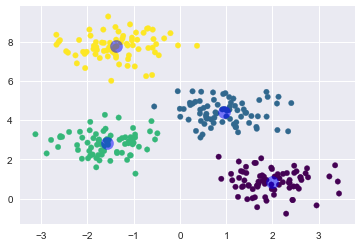

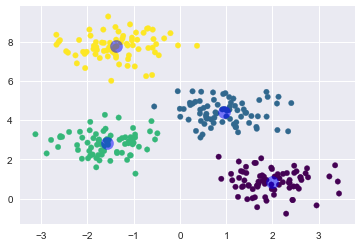

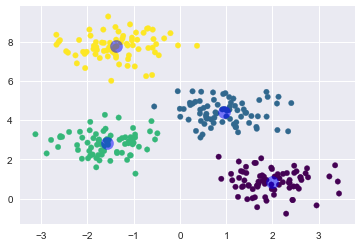

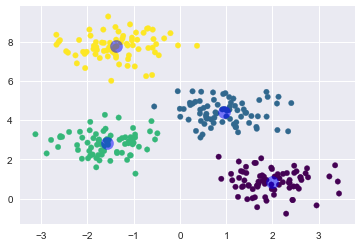

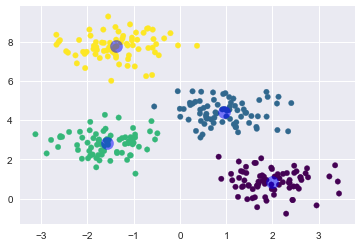

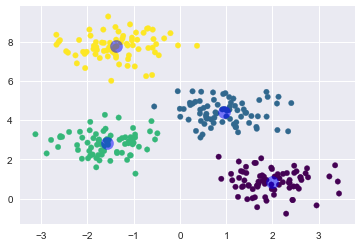

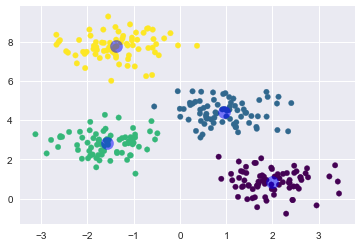

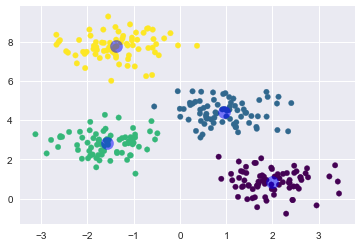

In [53]:
t0_random_model = time.clock()

random_model=KMeans(n_clusters=4, init='random') #random initialization of the clusters 
random_model.fit(X)
random_model_y=random_model.predict(X)

t1_random_model = time.clock()

elapsed_time_random_model = t1_random_model - t0_random_model

print('Accuracy:',sm.accuracy_score(y_true, random_model.labels_))
print('Iterations:', random_model.n_iter_) 
print('Time:', elapsed_time_random_model)

h=random_model.n_iter_


centers=random_model.cluster_centers_
#print(centers) #points for the clusters 
# plot the center points using the plt.scatter() 


for i in range (h):
    plt.scatter(X[:, 0], X[:, 1], c=random_model_y, s=30, cmap='viridis')
    plt.scatter(centers[:,0], centers[:, 1], c='blue', s=150, alpha=0.5) #first cluster
    plt.show()

